# Project 2

In [1]:
#Library Declaration
import numpy as np
import scipy as sp
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Library for themes
# from jupyterthemes import jtplot
# jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

## Cleaning data:

In [2]:
#Declaring headers as no headers defined data files
headers=["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_of_doors", "body_style", "drive_wheels",
        "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_of_cylinders",
         "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg",
         "highway_mpg", "price"]

path = "/Users/kushagrakhatwani/MDS/Project2/"

#convert into dataframe
df = pd.read_csv(path+"data_set.data",names=headers)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
#Shape of dataframe
df.shape

(204, 26)

In [4]:
#Datatypes of different columns in dataframe
df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [5]:
#Replace missing values with NAN
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#Checking number of missing values in each data column
m_dta = df.isnull().sum()
m_dta.sort_values(inplace=True, ascending=False)
m_dta.head()

normalized_losses    41
price                 4
stroke                4
bore                  4
peak_rpm              2
dtype: int64

In [7]:
#Calculating mean of all continuos variables 
avg_norm_loss = df["normalized_losses"].astype("float").mean(axis=0)
print("Average of normalized_losses: ", avg_norm_loss)

avg_bore = df['bore'].astype('float').mean(axis=0)
print("Average of bore: ", avg_bore)

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

avg_peakrpm = df['peak_rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

avg_price = df['price'].astype('float').mean(axis=0)
print("Average price:", avg_price)

Average of normalized_losses:  122.17791411042944
Average of bore:  3.328499999999999
Average of stroke: 3.2535
Average horsepower: 104.16336633663366
Average peak rpm: 5129.207920792079
Average price: 13132.285


In [8]:
#Fill in the missing values of continuos variables as mean
df["normalized_losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df['peak_rpm'].replace(np.nan, avg_peakrpm, inplace=True)
df['price'].replace(np.nan, avg_price, inplace=True)

In [9]:
#replacing missing value of categorical variable as mode of data
df['num_of_doors'].value_counts().idxmax()

'four'

In [10]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num_of_doors"].replace(np.nan, "four", inplace=True)

In [11]:
#Rechecking the data 
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.178,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.178,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.178,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
#Fixing data types of all the columns
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized_losses"]] = df[["normalized_losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak_rpm"]] = df[["peak_rpm"]].astype("float")
df[["horsepower"]] = df[["horsepower"]].astype("float")

In [13]:
#Rechecking the data_types
df.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [14]:
#Convert categorical data back into numerical storing every encoder using label_encoder
le1 = LabelEncoder()
le1.fit(df.make)
df['make'] = le1.transform(df.make)
print("Unique make encoders:",np.unique(df['make']))

le2 = LabelEncoder()
le2.fit(df.fuel_type)
df["fuel_type"] = le2.transform(df.fuel_type)
print("Unique fueltype encoders:",np.unique(df['fuel_type']))

le3 = LabelEncoder()
le3.fit(df.aspiration)
df['aspiration'] = le3.transform(df.aspiration)
print("Unique aspiration encoders:",np.unique(df['aspiration']))

le4 = LabelEncoder()
le4.fit(df.num_of_doors)
df['num_of_doors'] = le4.transform(df.num_of_doors)
print("Unique num_of_doors encoders:",np.unique(df['num_of_doors']))

le5 = LabelEncoder()
le5.fit(df.body_style)
df['body_style'] = le5.transform(df.body_style)
print("Unique bodystyle encoders:",np.unique(df['body_style']))

le6 = LabelEncoder()
le6.fit(df.drive_wheels)
df['drive_wheels'] = le6.transform(df.drive_wheels)
print("Unique drive_wheels encoders:",np.unique(df['drive_wheels']))

le7 = LabelEncoder()
le7.fit(df.engine_location)
df['engine_location'] = le7.transform(df.engine_location)
print("Unique engine_location encoders:",np.unique(df['engine_location']))

le8 = LabelEncoder()
le8.fit(df.fuel_system)
df['fuel_system'] = le8.transform(df.fuel_system)
print("Unique fuel_system encoders:",np.unique(df['fuel_system']))

le9 = LabelEncoder()
le9.fit(df.engine_type)
df['engine_type'] = le9.transform(df.engine_type)
print("Unique engine_type encoders:",np.unique(df['engine_type']))

le10 = LabelEncoder()
le10.fit(df.num_of_cylinders)
df['num_of_cylinders'] = le10.transform(df.num_of_cylinders)
print("Unique num_of_cylinders encoders:",np.unique(df['num_of_cylinders']))

Unique make encoders: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Unique fueltype encoders: [0 1]
Unique aspiration encoders: [0 1]
Unique num_of_doors encoders: [0 1]
Unique bodystyle encoders: [0 1 2 3 4]
Unique drive_wheels encoders: [0 1 2]
Unique engine_location encoders: [0 1]
Unique fuel_system encoders: [0 1 2 3 4 5 6 7]
Unique engine_type encoders: [0 1 2 3 4 5 6]
Unique num_of_cylinders encoders: [0 1 2 3 4 5 6]


In [15]:
#check all the datatypes to reconfirm
df.dtypes

symboling              int64
normalized_losses      int64
make                   int64
fuel_type              int64
aspiration             int64
num_of_doors           int64
body_style             int64
drive_wheels           int64
engine_location        int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type            int64
num_of_cylinders       int64
engine_size            int64
fuel_system            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [16]:
# corr = df.corr()

# plt.figure(figsize=(20,20))
# colormap = sns.diverging_palette(220,10, as_cmap=True)
# sns.heatmap(corr,cmap = colormap,annot=True,fmt='.2f')

In [17]:
#Saving data file as clean.csv
df.to_csv('clean_data.csv')

# Model without regularization:
## Loss funtion used:
 ### Categorical Cross Entropy

In [18]:
#convert clean data into dataframe
df = pd.read_csv(path + "clean_data.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [19]:
#Extracting our target variable or variable that we have to predict
target = df.iloc[:,0]
#Check the shape of target variable
print("Target Shape",target.shape)
#Extract features from our dataframe
features = df.iloc[:,1:]
#Check feature shape
print("Features shape:",features.shape)

Target Shape (204,)
Features shape: (204, 25)


In [20]:
#Normalizing our data
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [21]:
#Use one hot encoding to convert target variable into encoded vector
y_en = tf.keras.utils.to_categorical(target+2, num_classes=6)
print("Y_en.shape",y_en.shape)

Y_en.shape (204, 6)


In [22]:
#Split data into train and test to check for losses separately
X_train, X_test, y_train, y_test = train_test_split(features, y_en, test_size=0.20, random_state=42)

In [23]:
#Defining our NN model
model = Sequential()
model.add(Dense(20, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(6, activation="sigmoid"))
#Description of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 126       
Total params: 646
Trainable params: 646
Non-trainable params: 0
_________________________________________________________________


2021-11-12 20:41:06.539154: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
#Running model by using categorical_cross_entropy loss
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size = 51,epochs = 1500,verbose=1)

Epoch 1/1500


2021-11-12 20:41:06.634293: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


4/4 [==============================] - 1s 47ms/step - loss: 2.4429 - accuracy: 0.1656 - val_loss: 2.3571 - val_accuracy: 0.1951
Epoch 2/1500
4/4 [==============================] - 0s 6ms/step - loss: 2.3453 - accuracy: 0.1779 - val_loss: 2.2820 - val_accuracy: 0.1951
Epoch 3/1500
4/4 [==============================] - 0s 7ms/step - loss: 2.2613 - accuracy: 0.1779 - val_loss: 2.2081 - val_accuracy: 0.1951
Epoch 4/1500
4/4 [==============================] - 0s 8ms/step - loss: 2.1831 - accuracy: 0.1840 - val_loss: 2.1386 - val_accuracy: 0.2683
Epoch 5/1500
4/4 [==============================] - 0s 7ms/step - loss: 2.1049 - accuracy: 0.2086 - val_loss: 2.0766 - val_accuracy: 0.2683
Epoch 6/1500
4/4 [==============================] - 0s 7ms/step - loss: 2.0334 - accuracy: 0.2393 - val_loss: 2.0198 - val_accuracy: 0.2439
Epoch 7/1500
4/4 [==============================] - 0s 7ms/step - loss: 1.9703 - accuracy: 0.2699 - val_loss: 1.9663 - val_accuracy: 0.2439
Epoch 8/1500
4/4 [==============

4/4 [==============================] - 0s 8ms/step - loss: 0.9695 - accuracy: 0.6687 - val_loss: 1.3302 - val_accuracy: 0.5366
Epoch 60/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.9627 - accuracy: 0.6687 - val_loss: 1.3243 - val_accuracy: 0.5366
Epoch 61/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.9560 - accuracy: 0.6687 - val_loss: 1.3192 - val_accuracy: 0.5366
Epoch 62/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.9495 - accuracy: 0.6626 - val_loss: 1.3141 - val_accuracy: 0.5366
Epoch 63/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.9428 - accuracy: 0.6626 - val_loss: 1.3067 - val_accuracy: 0.5366
Epoch 64/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.9366 - accuracy: 0.6564 - val_loss: 1.2999 - val_accuracy: 0.5366
Epoch 65/1500
4/4 [==============================] - 0s 10ms/step - loss: 0.9301 - accuracy: 0.6626 - val_loss: 1.2955 - val_accuracy: 0.5366
Epoch 66/1500
4/4 [=======

4/4 [==============================] - 0s 8ms/step - loss: 0.6990 - accuracy: 0.7485 - val_loss: 1.0513 - val_accuracy: 0.6341
Epoch 118/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6958 - accuracy: 0.7546 - val_loss: 1.0468 - val_accuracy: 0.6341
Epoch 119/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.7607 - val_loss: 1.0438 - val_accuracy: 0.6341
Epoch 120/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6889 - accuracy: 0.7669 - val_loss: 1.0408 - val_accuracy: 0.6341
Epoch 121/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6860 - accuracy: 0.7730 - val_loss: 1.0357 - val_accuracy: 0.6341
Epoch 122/1500
4/4 [==============================] - 0s 9ms/step - loss: 0.6832 - accuracy: 0.7669 - val_loss: 1.0322 - val_accuracy: 0.6341
Epoch 123/1500
4/4 [==============================] - 0s 9ms/step - loss: 0.6804 - accuracy: 0.7730 - val_loss: 1.0270 - val_accuracy: 0.6341
Epoch 124/1500
4/4 [=

Epoch 175/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5457 - accuracy: 0.8160 - val_loss: 0.9472 - val_accuracy: 0.7073
Epoch 176/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.5438 - accuracy: 0.8160 - val_loss: 0.9417 - val_accuracy: 0.7073
Epoch 177/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.5415 - accuracy: 0.8221 - val_loss: 0.9360 - val_accuracy: 0.7073
Epoch 178/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5395 - accuracy: 0.8221 - val_loss: 0.9282 - val_accuracy: 0.7073
Epoch 179/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5370 - accuracy: 0.8344 - val_loss: 0.9196 - val_accuracy: 0.7073
Epoch 180/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5339 - accuracy: 0.8344 - val_loss: 0.9100 - val_accuracy: 0.7073
Epoch 181/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5319 - accuracy: 0.8405 - val_loss: 0.9002 - val_accuracy: 0.7073
Epoch 

Epoch 233/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4266 - accuracy: 0.8773 - val_loss: 0.8557 - val_accuracy: 0.6829
Epoch 234/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4244 - accuracy: 0.8773 - val_loss: 0.8544 - val_accuracy: 0.6829
Epoch 235/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4227 - accuracy: 0.8773 - val_loss: 0.8523 - val_accuracy: 0.6829
Epoch 236/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.4212 - accuracy: 0.8773 - val_loss: 0.8495 - val_accuracy: 0.6829
Epoch 237/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.4193 - accuracy: 0.8773 - val_loss: 0.8470 - val_accuracy: 0.6829
Epoch 238/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4174 - accuracy: 0.8773 - val_loss: 0.8425 - val_accuracy: 0.6829
Epoch 239/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4161 - accuracy: 0.8773 - val_loss: 0.8382 - val_accuracy: 0.6829
Epoch 

Epoch 291/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.3350 - accuracy: 0.9141 - val_loss: 0.8844 - val_accuracy: 0.7073
Epoch 292/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.3336 - accuracy: 0.9141 - val_loss: 0.8907 - val_accuracy: 0.7073
Epoch 293/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.3328 - accuracy: 0.9141 - val_loss: 0.8934 - val_accuracy: 0.7073
Epoch 294/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.3312 - accuracy: 0.9141 - val_loss: 0.8929 - val_accuracy: 0.7073
Epoch 295/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.3295 - accuracy: 0.9141 - val_loss: 0.8924 - val_accuracy: 0.7073
Epoch 296/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.3281 - accuracy: 0.9141 - val_loss: 0.8887 - val_accuracy: 0.7073
Epoch 297/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.3268 - accuracy: 0.9141 - val_loss: 0.8768 - val_accuracy: 0.7073
Epoch 

Epoch 349/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.2631 - accuracy: 0.9264 - val_loss: 0.9293 - val_accuracy: 0.6829
Epoch 350/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.2621 - accuracy: 0.9264 - val_loss: 0.9320 - val_accuracy: 0.6829
Epoch 351/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.2616 - accuracy: 0.9264 - val_loss: 0.9343 - val_accuracy: 0.6829
Epoch 352/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.2600 - accuracy: 0.9264 - val_loss: 0.9300 - val_accuracy: 0.6829
Epoch 353/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.2591 - accuracy: 0.9264 - val_loss: 0.9257 - val_accuracy: 0.6829
Epoch 354/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.2580 - accuracy: 0.9264 - val_loss: 0.9250 - val_accuracy: 0.6829
Epoch 355/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.2571 - accuracy: 0.9325 - val_loss: 0.9268 - val_accuracy: 0.6585
Epoch 

Epoch 407/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.2097 - accuracy: 0.9509 - val_loss: 0.9422 - val_accuracy: 0.6829
Epoch 408/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.2089 - accuracy: 0.9509 - val_loss: 0.9429 - val_accuracy: 0.6829
Epoch 409/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.2076 - accuracy: 0.9509 - val_loss: 0.9469 - val_accuracy: 0.6829
Epoch 410/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.2064 - accuracy: 0.9571 - val_loss: 0.9487 - val_accuracy: 0.6829
Epoch 411/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.2057 - accuracy: 0.9571 - val_loss: 0.9465 - val_accuracy: 0.6829
Epoch 412/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.2056 - accuracy: 0.9571 - val_loss: 0.9457 - val_accuracy: 0.6829
Epoch 413/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.2048 - accuracy: 0.9571 - val_loss: 0.9476 - val_accuracy: 0.6829
Epoch 

Epoch 465/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.1664 - accuracy: 0.9755 - val_loss: 1.0009 - val_accuracy: 0.6829
Epoch 466/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.1655 - accuracy: 0.9755 - val_loss: 0.9988 - val_accuracy: 0.6829
Epoch 467/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.1644 - accuracy: 0.9755 - val_loss: 0.9956 - val_accuracy: 0.6829
Epoch 468/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.1638 - accuracy: 0.9755 - val_loss: 0.9963 - val_accuracy: 0.6829
Epoch 469/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.1631 - accuracy: 0.9755 - val_loss: 0.9998 - val_accuracy: 0.6829
Epoch 470/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.1624 - accuracy: 0.9755 - val_loss: 0.9994 - val_accuracy: 0.6829
Epoch 471/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.1619 - accuracy: 0.9755 - val_loss: 1.0023 - val_accuracy: 0.6829
Epoch 

Epoch 523/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1322 - accuracy: 0.9816 - val_loss: 1.0588 - val_accuracy: 0.7073
Epoch 524/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1317 - accuracy: 0.9816 - val_loss: 1.0600 - val_accuracy: 0.7073
Epoch 525/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.1313 - accuracy: 0.9877 - val_loss: 1.0622 - val_accuracy: 0.7073
Epoch 526/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.1310 - accuracy: 0.9877 - val_loss: 1.0611 - val_accuracy: 0.7073
Epoch 527/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1303 - accuracy: 0.9877 - val_loss: 1.0560 - val_accuracy: 0.7073
Epoch 528/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1297 - accuracy: 0.9877 - val_loss: 1.0557 - val_accuracy: 0.7073
Epoch 529/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1295 - accuracy: 0.9877 - val_loss: 1.0573 - val_accuracy: 0.7073
Epoch 

Epoch 581/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1058 - accuracy: 1.0000 - val_loss: 1.1188 - val_accuracy: 0.7317
Epoch 582/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1053 - accuracy: 1.0000 - val_loss: 1.1165 - val_accuracy: 0.7317
Epoch 583/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1048 - accuracy: 1.0000 - val_loss: 1.1138 - val_accuracy: 0.7561
Epoch 584/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1047 - accuracy: 1.0000 - val_loss: 1.1111 - val_accuracy: 0.7561
Epoch 585/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1042 - accuracy: 1.0000 - val_loss: 1.1095 - val_accuracy: 0.7561
Epoch 586/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1039 - accuracy: 1.0000 - val_loss: 1.1065 - val_accuracy: 0.7561
Epoch 587/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.1035 - accuracy: 1.0000 - val_loss: 1.1047 - val_accuracy: 0.7561
Epoch 

Epoch 639/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0853 - accuracy: 1.0000 - val_loss: 1.1885 - val_accuracy: 0.7561
Epoch 640/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0850 - accuracy: 1.0000 - val_loss: 1.1878 - val_accuracy: 0.7561
Epoch 641/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0847 - accuracy: 1.0000 - val_loss: 1.1892 - val_accuracy: 0.7561
Epoch 642/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0845 - accuracy: 1.0000 - val_loss: 1.1873 - val_accuracy: 0.7561
Epoch 643/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0841 - accuracy: 1.0000 - val_loss: 1.1873 - val_accuracy: 0.7561
Epoch 644/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0840 - accuracy: 1.0000 - val_loss: 1.1885 - val_accuracy: 0.7561
Epoch 645/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0836 - accuracy: 1.0000 - val_loss: 1.1938 - val_accuracy: 0.7561
Epoch 

Epoch 697/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0695 - accuracy: 1.0000 - val_loss: 1.2811 - val_accuracy: 0.7561
Epoch 698/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0690 - accuracy: 1.0000 - val_loss: 1.2811 - val_accuracy: 0.7561
Epoch 699/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0687 - accuracy: 1.0000 - val_loss: 1.2812 - val_accuracy: 0.7561
Epoch 700/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0685 - accuracy: 1.0000 - val_loss: 1.2816 - val_accuracy: 0.7561
Epoch 701/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0684 - accuracy: 1.0000 - val_loss: 1.2804 - val_accuracy: 0.7561
Epoch 702/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0681 - accuracy: 1.0000 - val_loss: 1.2817 - val_accuracy: 0.7561
Epoch 703/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0677 - accuracy: 1.0000 - val_loss: 1.2881 - val_accuracy: 0.7561
Epoch 

Epoch 755/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0567 - accuracy: 1.0000 - val_loss: 1.3601 - val_accuracy: 0.7561
Epoch 756/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0566 - accuracy: 1.0000 - val_loss: 1.3585 - val_accuracy: 0.7561
Epoch 757/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0563 - accuracy: 1.0000 - val_loss: 1.3556 - val_accuracy: 0.7561
Epoch 758/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0561 - accuracy: 1.0000 - val_loss: 1.3517 - val_accuracy: 0.7561
Epoch 759/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0561 - accuracy: 1.0000 - val_loss: 1.3502 - val_accuracy: 0.7561
Epoch 760/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0557 - accuracy: 1.0000 - val_loss: 1.3491 - val_accuracy: 0.7561
Epoch 761/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0556 - accuracy: 1.0000 - val_loss: 1.3497 - val_accuracy: 0.7561
Epoch 

Epoch 813/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0469 - accuracy: 1.0000 - val_loss: 1.4002 - val_accuracy: 0.7561
Epoch 814/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0466 - accuracy: 1.0000 - val_loss: 1.4034 - val_accuracy: 0.7561
Epoch 815/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.0465 - accuracy: 1.0000 - val_loss: 1.4088 - val_accuracy: 0.7561
Epoch 816/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0463 - accuracy: 1.0000 - val_loss: 1.4131 - val_accuracy: 0.7561
Epoch 817/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0461 - accuracy: 1.0000 - val_loss: 1.4176 - val_accuracy: 0.7561
Epoch 818/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 1.4198 - val_accuracy: 0.7561
Epoch 819/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 1.4201 - val_accuracy: 0.7561
Epoch 

Epoch 871/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0390 - accuracy: 1.0000 - val_loss: 1.5076 - val_accuracy: 0.7561
Epoch 872/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 1.5111 - val_accuracy: 0.7561
Epoch 873/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 1.5131 - val_accuracy: 0.7561
Epoch 874/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 1.5144 - val_accuracy: 0.7561
Epoch 875/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 1.5125 - val_accuracy: 0.7561
Epoch 876/1500
4/4 [==============================] - 0s 9ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 1.5113 - val_accuracy: 0.7561
Epoch 877/1500
4/4 [==============================] - 0s 9ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 1.5107 - val_accuracy: 0.7561
Epoch 

Epoch 929/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 1.5892 - val_accuracy: 0.7561
Epoch 930/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 1.5858 - val_accuracy: 0.7561
Epoch 931/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 1.5821 - val_accuracy: 0.7561
Epoch 932/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 1.5822 - val_accuracy: 0.7561
Epoch 933/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0317 - accuracy: 1.0000 - val_loss: 1.5778 - val_accuracy: 0.7561
Epoch 934/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 1.5765 - val_accuracy: 0.7561
Epoch 935/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 1.5768 - val_accuracy: 0.7561
Epoch 

Epoch 987/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 1.6653 - val_accuracy: 0.7561
Epoch 988/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 1.6681 - val_accuracy: 0.7561
Epoch 989/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 1.6696 - val_accuracy: 0.7561
Epoch 990/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 1.6725 - val_accuracy: 0.7561
Epoch 991/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 1.6765 - val_accuracy: 0.7561
Epoch 992/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 1.6814 - val_accuracy: 0.7561
Epoch 993/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 1.6856 - val_accuracy: 0.7561
Epoch 

4/4 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 1.7437 - val_accuracy: 0.7561
Epoch 1045/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 1.7458 - val_accuracy: 0.7561
Epoch 1046/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 1.7475 - val_accuracy: 0.7561
Epoch 1047/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 1.7494 - val_accuracy: 0.7561
Epoch 1048/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 1.7516 - val_accuracy: 0.7561
Epoch 1049/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 1.7538 - val_accuracy: 0.7561
Epoch 1050/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 1.7537 - val_accuracy: 0.7561
Epoch 1051/1500

4/4 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 1.8173 - val_accuracy: 0.7561
Epoch 1102/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0183 - accuracy: 1.0000 - val_loss: 1.8173 - val_accuracy: 0.7561
Epoch 1103/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0183 - accuracy: 1.0000 - val_loss: 1.8166 - val_accuracy: 0.7561
Epoch 1104/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 1.8190 - val_accuracy: 0.7561
Epoch 1105/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 1.8212 - val_accuracy: 0.7561
Epoch 1106/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 1.8269 - val_accuracy: 0.7561
Epoch 1107/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 1.8294 - val_accuracy: 0.7561
Epoch 1108/1500

4/4 [==============================] - 0s 7ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 1.8746 - val_accuracy: 0.7561
Epoch 1159/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 1.8792 - val_accuracy: 0.7561
Epoch 1160/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 1.8862 - val_accuracy: 0.7561
Epoch 1161/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 1.8923 - val_accuracy: 0.7561
Epoch 1162/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 1.8961 - val_accuracy: 0.7561
Epoch 1163/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 1.8980 - val_accuracy: 0.7561
Epoch 1164/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 1.8984 - val_accuracy: 0.7561
Epoch 1165/1500

4/4 [==============================] - 0s 7ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 1.9268 - val_accuracy: 0.7561
Epoch 1216/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 1.9288 - val_accuracy: 0.7561
Epoch 1217/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 1.9335 - val_accuracy: 0.7561
Epoch 1218/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 1.9368 - val_accuracy: 0.7561
Epoch 1219/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 1.9382 - val_accuracy: 0.7561
Epoch 1220/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 1.9396 - val_accuracy: 0.7561
Epoch 1221/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 1.9371 - val_accuracy: 0.7561
Epoch 1222/1500

4/4 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 1.9859 - val_accuracy: 0.7561
Epoch 1273/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 1.9825 - val_accuracy: 0.7561
Epoch 1274/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 1.9829 - val_accuracy: 0.7561
Epoch 1275/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 1.9887 - val_accuracy: 0.7561
Epoch 1276/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.9914 - val_accuracy: 0.7561
Epoch 1277/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.9923 - val_accuracy: 0.7561
Epoch 1278/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 1.9930 - val_accuracy: 0.7561
Epoch 1279/1500

4/4 [==============================] - 0s 8ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 2.0449 - val_accuracy: 0.7561
Epoch 1330/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 2.0429 - val_accuracy: 0.7561
Epoch 1331/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 2.0454 - val_accuracy: 0.7561
Epoch 1332/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 2.0483 - val_accuracy: 0.7561
Epoch 1333/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 2.0521 - val_accuracy: 0.7561
Epoch 1334/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 2.0571 - val_accuracy: 0.7561
Epoch 1335/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 2.0585 - val_accuracy: 0.7561
Epoch 1336/1500

4/4 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 2.0943 - val_accuracy: 0.7561
Epoch 1387/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 2.0947 - val_accuracy: 0.7561
Epoch 1388/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.0967 - val_accuracy: 0.7561
Epoch 1389/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.0989 - val_accuracy: 0.7561
Epoch 1390/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.0991 - val_accuracy: 0.7561
Epoch 1391/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 2.0991 - val_accuracy: 0.7561
Epoch 1392/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 2.0997 - val_accuracy: 0.7561
Epoch 1393/1500

4/4 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 2.1569 - val_accuracy: 0.7561
Epoch 1444/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 2.1579 - val_accuracy: 0.7561
Epoch 1445/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 2.1597 - val_accuracy: 0.7561
Epoch 1446/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 2.1631 - val_accuracy: 0.7561
Epoch 1447/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 2.1630 - val_accuracy: 0.7561
Epoch 1448/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 2.1615 - val_accuracy: 0.7561
Epoch 1449/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 2.1599 - val_accuracy: 0.7561
Epoch 1450/1500

4/4 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 2.2063 - val_accuracy: 0.7561


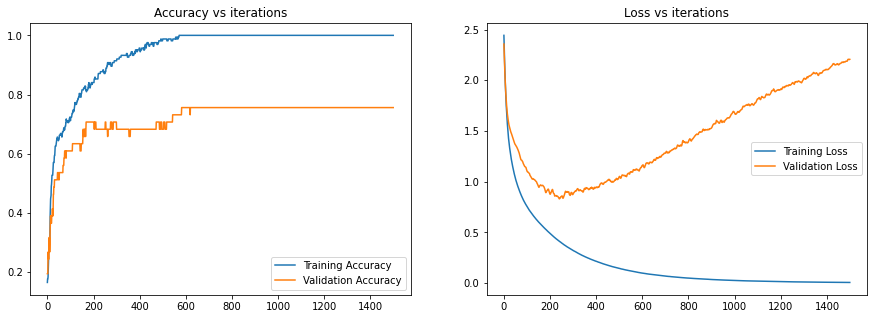

In [25]:
#Get accuracy from the model
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

#Get losses from the model
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(1500)

#Plot training and validation losses and accuracy
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.title("Accuracy vs iterations")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend()
plt.title("Loss vs iterations")
plt.show()

In [26]:
test_data_pt = pd.read_csv(path+"data_point.txt",header=None)
test_data_pt.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176


In [27]:
test_data_pt[1] = le1.transform(test_data_pt[1])
test_data_pt[2] = le2.transform(test_data_pt[2])
test_data_pt[3] = le3.transform(test_data_pt[3])
test_data_pt[4] = le4.transform(test_data_pt[4])
test_data_pt[5] = le5.transform(test_data_pt[5])
test_data_pt[6] = le6.transform(test_data_pt[6])
test_data_pt[7] = le7.transform(test_data_pt[7])
test_data_pt[16] = le8.transform(test_data_pt[16])
test_data_pt[13] = le9.transform(test_data_pt[13])
test_data_pt[14] = le10.transform(test_data_pt[14])

test_data_pt = scaler.transform(test_data_pt)

In [28]:
pred = model.predict(test_data_pt)
print("Insurance risk score (Symboling):",np.argmax(pred[0][:])-2)

Insurance risk score (Symboling): 0


# Model with regularization:
## Loss funtion used:
 ### Categorical Cross Entropy + L1 regularizer

In [40]:
#convert clean data into dataframe
df = pd.read_csv("/Users/kushagrakhatwani/MDS/Project2/clean_data.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [41]:
#Extracting our target variable or variable that we have to predict
target = df.iloc[:,0]
#Check the shape of target variable
print("Target Shape",target.shape)
#Extract features from our dataframe
features = df.iloc[:,1:]
#Check feature shape
print("Features shape:",features.shape)

Target Shape (204,)
Features shape: (204, 25)


In [42]:
#Normalizing our data
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [43]:
#Use one hot encoding to convert target variable into encoded vector
y_en = tf.keras.utils.to_categorical(target+2 , num_classes=6)
print("Y_en.shape",y_en.shape)

Y_en.shape (204, 6)


In [44]:
#Split data into train and test to check for losses separately
X_train, X_test, y_train, y_test = train_test_split(features, y_en, test_size=0.20, random_state=42)

In [45]:
#Defining our NN model
model = Sequential()
model.add(Dense(20, input_shape=(X_train.shape[1],), activation="relu",kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(6, activation="sigmoid"))
#Description of our model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 126       
Total params: 646
Trainable params: 646
Non-trainable params: 0
_________________________________________________________________


In [46]:
#Running model by using categorical_cross_entropy loss using L1 regularization
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=51,epochs = 1500,verbose=1)

Epoch 1/1500
4/4 [==============================] - 0s 44ms/step - loss: 2.7255 - accuracy: 0.2025 - val_loss: 2.8758 - val_accuracy: 0.0976
Epoch 2/1500
4/4 [==============================] - 0s 6ms/step - loss: 2.6662 - accuracy: 0.2270 - val_loss: 2.8208 - val_accuracy: 0.0976
Epoch 3/1500
4/4 [==============================] - 0s 8ms/step - loss: 2.6147 - accuracy: 0.2822 - val_loss: 2.7677 - val_accuracy: 0.1707
Epoch 4/1500
4/4 [==============================] - 0s 7ms/step - loss: 2.5659 - accuracy: 0.3067 - val_loss: 2.7173 - val_accuracy: 0.1707
Epoch 5/1500
4/4 [==============================] - 0s 7ms/step - loss: 2.5216 - accuracy: 0.3436 - val_loss: 2.6694 - val_accuracy: 0.2195
Epoch 6/1500
4/4 [==============================] - 0s 10ms/step - loss: 2.4772 - accuracy: 0.4049 - val_loss: 2.6265 - val_accuracy: 0.2683
Epoch 7/1500
4/4 [==============================] - 0s 8ms/step - loss: 2.4379 - accuracy: 0.4356 - val_loss: 2.5878 - val_accuracy: 0.3415
Epoch 8/1500
4/4 [

4/4 [==============================] - 0s 8ms/step - loss: 1.5248 - accuracy: 0.7239 - val_loss: 1.7597 - val_accuracy: 0.5854
Epoch 60/1500
4/4 [==============================] - 0s 8ms/step - loss: 1.5158 - accuracy: 0.7362 - val_loss: 1.7515 - val_accuracy: 0.5854
Epoch 61/1500
4/4 [==============================] - 0s 10ms/step - loss: 1.5071 - accuracy: 0.7362 - val_loss: 1.7446 - val_accuracy: 0.6098
Epoch 62/1500
4/4 [==============================] - 0s 8ms/step - loss: 1.4981 - accuracy: 0.7301 - val_loss: 1.7370 - val_accuracy: 0.6098
Epoch 63/1500
4/4 [==============================] - 0s 9ms/step - loss: 1.4902 - accuracy: 0.7362 - val_loss: 1.7312 - val_accuracy: 0.6098
Epoch 64/1500
4/4 [==============================] - 0s 8ms/step - loss: 1.4819 - accuracy: 0.7362 - val_loss: 1.7230 - val_accuracy: 0.6098
Epoch 65/1500
4/4 [==============================] - 0s 8ms/step - loss: 1.4735 - accuracy: 0.7362 - val_loss: 1.7167 - val_accuracy: 0.6098
Epoch 66/1500
4/4 [=======

4/4 [==============================] - 0s 7ms/step - loss: 1.1753 - accuracy: 0.7914 - val_loss: 1.4412 - val_accuracy: 0.6585
Epoch 118/1500
4/4 [==============================] - 0s 7ms/step - loss: 1.1714 - accuracy: 0.7914 - val_loss: 1.4406 - val_accuracy: 0.6585
Epoch 119/1500
4/4 [==============================] - 0s 7ms/step - loss: 1.1669 - accuracy: 0.7914 - val_loss: 1.4415 - val_accuracy: 0.6585
Epoch 120/1500
4/4 [==============================] - 0s 7ms/step - loss: 1.1630 - accuracy: 0.7914 - val_loss: 1.4415 - val_accuracy: 0.6585
Epoch 121/1500
4/4 [==============================] - 0s 7ms/step - loss: 1.1589 - accuracy: 0.7914 - val_loss: 1.4368 - val_accuracy: 0.6585
Epoch 122/1500
4/4 [==============================] - 0s 7ms/step - loss: 1.1552 - accuracy: 0.7975 - val_loss: 1.4342 - val_accuracy: 0.6585
Epoch 123/1500
4/4 [==============================] - 0s 8ms/step - loss: 1.1513 - accuracy: 0.7914 - val_loss: 1.4334 - val_accuracy: 0.6585
Epoch 124/1500
4/4 [=

Epoch 175/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.9996 - accuracy: 0.8282 - val_loss: 1.2894 - val_accuracy: 0.7073
Epoch 176/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.9972 - accuracy: 0.8282 - val_loss: 1.2885 - val_accuracy: 0.7073
Epoch 177/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.9951 - accuracy: 0.8282 - val_loss: 1.2891 - val_accuracy: 0.7073
Epoch 178/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.9928 - accuracy: 0.8282 - val_loss: 1.2905 - val_accuracy: 0.7073
Epoch 179/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.9913 - accuracy: 0.8282 - val_loss: 1.2929 - val_accuracy: 0.7073
Epoch 180/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.9895 - accuracy: 0.8221 - val_loss: 1.2952 - val_accuracy: 0.6829
Epoch 181/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.9873 - accuracy: 0.8282 - val_loss: 1.2954 - val_accuracy: 0.6829
Epoch 

Epoch 233/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.8995 - accuracy: 0.8528 - val_loss: 1.2676 - val_accuracy: 0.7073
Epoch 234/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.8976 - accuracy: 0.8528 - val_loss: 1.2669 - val_accuracy: 0.7073
Epoch 235/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.8961 - accuracy: 0.8528 - val_loss: 1.2690 - val_accuracy: 0.6829
Epoch 236/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.8953 - accuracy: 0.8405 - val_loss: 1.2709 - val_accuracy: 0.6829
Epoch 237/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.8939 - accuracy: 0.8466 - val_loss: 1.2704 - val_accuracy: 0.6829
Epoch 238/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.8922 - accuracy: 0.8405 - val_loss: 1.2688 - val_accuracy: 0.6829
Epoch 239/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.8909 - accuracy: 0.8466 - val_loss: 1.2667 - val_accuracy: 0.6829
Epoch 

Epoch 291/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.8316 - accuracy: 0.8712 - val_loss: 1.2227 - val_accuracy: 0.7073
Epoch 292/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.8306 - accuracy: 0.8712 - val_loss: 1.2241 - val_accuracy: 0.7073
Epoch 293/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.8291 - accuracy: 0.8712 - val_loss: 1.2285 - val_accuracy: 0.7073
Epoch 294/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.8285 - accuracy: 0.8712 - val_loss: 1.2322 - val_accuracy: 0.7073
Epoch 295/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.8274 - accuracy: 0.8712 - val_loss: 1.2286 - val_accuracy: 0.7073
Epoch 296/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.8265 - accuracy: 0.8712 - val_loss: 1.2231 - val_accuracy: 0.7073
Epoch 297/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.8259 - accuracy: 0.8650 - val_loss: 1.2233 - val_accuracy: 0.7073
Epoch 

Epoch 349/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7794 - accuracy: 0.8712 - val_loss: 1.2108 - val_accuracy: 0.7073
Epoch 350/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7784 - accuracy: 0.8712 - val_loss: 1.2069 - val_accuracy: 0.7561
Epoch 351/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7775 - accuracy: 0.8773 - val_loss: 1.2065 - val_accuracy: 0.7561
Epoch 352/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.7773 - accuracy: 0.8773 - val_loss: 1.2030 - val_accuracy: 0.7561
Epoch 353/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7763 - accuracy: 0.8773 - val_loss: 1.2032 - val_accuracy: 0.7561
Epoch 354/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7752 - accuracy: 0.8773 - val_loss: 1.2010 - val_accuracy: 0.7561
Epoch 355/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7743 - accuracy: 0.8712 - val_loss: 1.1960 - val_accuracy: 0.7561
Epoch 

Epoch 407/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7359 - accuracy: 0.8896 - val_loss: 1.1873 - val_accuracy: 0.7561
Epoch 408/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7346 - accuracy: 0.8834 - val_loss: 1.1877 - val_accuracy: 0.7561
Epoch 409/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7339 - accuracy: 0.8773 - val_loss: 1.1885 - val_accuracy: 0.7561
Epoch 410/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7333 - accuracy: 0.8834 - val_loss: 1.1855 - val_accuracy: 0.7561
Epoch 411/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7328 - accuracy: 0.8834 - val_loss: 1.1822 - val_accuracy: 0.7561
Epoch 412/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7323 - accuracy: 0.8834 - val_loss: 1.1805 - val_accuracy: 0.7561
Epoch 413/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.7311 - accuracy: 0.8712 - val_loss: 1.1850 - val_accuracy: 0.7561
Epoch 

Epoch 465/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6975 - accuracy: 0.8896 - val_loss: 1.1603 - val_accuracy: 0.7561
Epoch 466/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6970 - accuracy: 0.8896 - val_loss: 1.1641 - val_accuracy: 0.7561
Epoch 467/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6965 - accuracy: 0.8834 - val_loss: 1.1601 - val_accuracy: 0.7561
Epoch 468/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6952 - accuracy: 0.8896 - val_loss: 1.1495 - val_accuracy: 0.7561
Epoch 469/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6952 - accuracy: 0.8834 - val_loss: 1.1465 - val_accuracy: 0.7561
Epoch 470/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.8834 - val_loss: 1.1461 - val_accuracy: 0.7561
Epoch 471/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6946 - accuracy: 0.8834 - val_loss: 1.1541 - val_accuracy: 0.7561
Epoch 

Epoch 523/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6646 - accuracy: 0.8896 - val_loss: 1.1272 - val_accuracy: 0.7561
Epoch 524/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6636 - accuracy: 0.8834 - val_loss: 1.1304 - val_accuracy: 0.7561
Epoch 525/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6629 - accuracy: 0.8834 - val_loss: 1.1286 - val_accuracy: 0.7561
Epoch 526/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6622 - accuracy: 0.8834 - val_loss: 1.1323 - val_accuracy: 0.7561
Epoch 527/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6614 - accuracy: 0.8896 - val_loss: 1.1350 - val_accuracy: 0.7561
Epoch 528/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6607 - accuracy: 0.8957 - val_loss: 1.1307 - val_accuracy: 0.7561
Epoch 529/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6606 - accuracy: 0.9018 - val_loss: 1.1250 - val_accuracy: 0.7561
Epoch 

Epoch 581/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6354 - accuracy: 0.8957 - val_loss: 1.1350 - val_accuracy: 0.7561
Epoch 582/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6341 - accuracy: 0.9018 - val_loss: 1.1266 - val_accuracy: 0.7561
Epoch 583/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6348 - accuracy: 0.9018 - val_loss: 1.1220 - val_accuracy: 0.7561
Epoch 584/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6341 - accuracy: 0.9018 - val_loss: 1.1277 - val_accuracy: 0.7561
Epoch 585/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6329 - accuracy: 0.9018 - val_loss: 1.1355 - val_accuracy: 0.7561
Epoch 586/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6331 - accuracy: 0.8957 - val_loss: 1.1419 - val_accuracy: 0.7561
Epoch 587/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6329 - accuracy: 0.8957 - val_loss: 1.1334 - val_accuracy: 0.7561
Epoch 

Epoch 639/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6098 - accuracy: 0.9080 - val_loss: 1.1305 - val_accuracy: 0.7561
Epoch 640/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6088 - accuracy: 0.9080 - val_loss: 1.1267 - val_accuracy: 0.7561
Epoch 641/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6081 - accuracy: 0.9141 - val_loss: 1.1189 - val_accuracy: 0.7561
Epoch 642/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6078 - accuracy: 0.9141 - val_loss: 1.1142 - val_accuracy: 0.7561
Epoch 643/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6073 - accuracy: 0.9141 - val_loss: 1.1187 - val_accuracy: 0.7561
Epoch 644/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.6073 - accuracy: 0.9141 - val_loss: 1.1252 - val_accuracy: 0.7561
Epoch 645/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.6062 - accuracy: 0.9141 - val_loss: 1.1306 - val_accuracy: 0.7561
Epoch 

Epoch 697/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5871 - accuracy: 0.9264 - val_loss: 1.1112 - val_accuracy: 0.7561
Epoch 698/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5861 - accuracy: 0.9264 - val_loss: 1.1170 - val_accuracy: 0.7561
Epoch 699/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5871 - accuracy: 0.9264 - val_loss: 1.1176 - val_accuracy: 0.7561
Epoch 700/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5858 - accuracy: 0.9264 - val_loss: 1.1111 - val_accuracy: 0.7561
Epoch 701/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.5849 - accuracy: 0.9264 - val_loss: 1.1065 - val_accuracy: 0.7561
Epoch 702/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5842 - accuracy: 0.9264 - val_loss: 1.1037 - val_accuracy: 0.7561
Epoch 703/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5842 - accuracy: 0.9264 - val_loss: 1.1037 - val_accuracy: 0.7561
Epoch 

Epoch 755/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5665 - accuracy: 0.9202 - val_loss: 1.1305 - val_accuracy: 0.7561
Epoch 756/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.5652 - accuracy: 0.9264 - val_loss: 1.1338 - val_accuracy: 0.7561
Epoch 757/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.5649 - accuracy: 0.9264 - val_loss: 1.1366 - val_accuracy: 0.8049
Epoch 758/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5645 - accuracy: 0.9202 - val_loss: 1.1309 - val_accuracy: 0.8049
Epoch 759/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.5635 - accuracy: 0.9202 - val_loss: 1.1209 - val_accuracy: 0.8049
Epoch 760/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5628 - accuracy: 0.9202 - val_loss: 1.1124 - val_accuracy: 0.7561
Epoch 761/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5632 - accuracy: 0.9264 - val_loss: 1.0930 - val_accuracy: 0.7561
Epoch 

Epoch 813/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.5423 - accuracy: 0.9325 - val_loss: 1.1098 - val_accuracy: 0.7561
Epoch 814/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5423 - accuracy: 0.9264 - val_loss: 1.1123 - val_accuracy: 0.7561
Epoch 815/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5419 - accuracy: 0.9264 - val_loss: 1.1191 - val_accuracy: 0.7317
Epoch 816/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5416 - accuracy: 0.9325 - val_loss: 1.1154 - val_accuracy: 0.7317
Epoch 817/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5411 - accuracy: 0.9325 - val_loss: 1.0997 - val_accuracy: 0.7561
Epoch 818/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5409 - accuracy: 0.9325 - val_loss: 1.0882 - val_accuracy: 0.7561
Epoch 819/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5425 - accuracy: 0.9325 - val_loss: 1.0893 - val_accuracy: 0.7805
Epoch 

Epoch 871/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5225 - accuracy: 0.9325 - val_loss: 1.1017 - val_accuracy: 0.7805
Epoch 872/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5220 - accuracy: 0.9448 - val_loss: 1.1050 - val_accuracy: 0.7805
Epoch 873/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5227 - accuracy: 0.9509 - val_loss: 1.1096 - val_accuracy: 0.7805
Epoch 874/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5229 - accuracy: 0.9448 - val_loss: 1.1131 - val_accuracy: 0.7805
Epoch 875/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5223 - accuracy: 0.9387 - val_loss: 1.1168 - val_accuracy: 0.7805
Epoch 876/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.5208 - accuracy: 0.9387 - val_loss: 1.1058 - val_accuracy: 0.7805
Epoch 877/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5214 - accuracy: 0.9509 - val_loss: 1.0991 - val_accuracy: 0.7805
Epoch 

Epoch 929/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5040 - accuracy: 0.9509 - val_loss: 1.0968 - val_accuracy: 0.7805
Epoch 930/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.5036 - accuracy: 0.9509 - val_loss: 1.0965 - val_accuracy: 0.8049
Epoch 931/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5027 - accuracy: 0.9448 - val_loss: 1.0973 - val_accuracy: 0.8049
Epoch 932/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5023 - accuracy: 0.9632 - val_loss: 1.0906 - val_accuracy: 0.8049
Epoch 933/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5033 - accuracy: 0.9571 - val_loss: 1.0897 - val_accuracy: 0.7805
Epoch 934/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5024 - accuracy: 0.9509 - val_loss: 1.0966 - val_accuracy: 0.7805
Epoch 935/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.5014 - accuracy: 0.9509 - val_loss: 1.1066 - val_accuracy: 0.8293
Epoch 

Epoch 987/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4878 - accuracy: 0.9693 - val_loss: 1.0927 - val_accuracy: 0.8293
Epoch 988/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4870 - accuracy: 0.9755 - val_loss: 1.1007 - val_accuracy: 0.8049
Epoch 989/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4869 - accuracy: 0.9816 - val_loss: 1.1052 - val_accuracy: 0.8049
Epoch 990/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4871 - accuracy: 0.9755 - val_loss: 1.1120 - val_accuracy: 0.8293
Epoch 991/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4869 - accuracy: 0.9755 - val_loss: 1.1243 - val_accuracy: 0.8293
Epoch 992/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4888 - accuracy: 0.9632 - val_loss: 1.1314 - val_accuracy: 0.8293
Epoch 993/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4887 - accuracy: 0.9632 - val_loss: 1.1237 - val_accuracy: 0.8537
Epoch 

4/4 [==============================] - 0s 7ms/step - loss: 0.4753 - accuracy: 0.9877 - val_loss: 1.0768 - val_accuracy: 0.8293
Epoch 1045/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4735 - accuracy: 0.9877 - val_loss: 1.0800 - val_accuracy: 0.8293
Epoch 1046/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4728 - accuracy: 0.9816 - val_loss: 1.0879 - val_accuracy: 0.8293
Epoch 1047/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4736 - accuracy: 0.9816 - val_loss: 1.0948 - val_accuracy: 0.8537
Epoch 1048/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4732 - accuracy: 0.9816 - val_loss: 1.0930 - val_accuracy: 0.8537
Epoch 1049/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4722 - accuracy: 0.9755 - val_loss: 1.0850 - val_accuracy: 0.8293
Epoch 1050/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4713 - accuracy: 0.9816 - val_loss: 1.0716 - val_accuracy: 0.8293
Epoch 1051/1500

4/4 [==============================] - 0s 7ms/step - loss: 0.4586 - accuracy: 0.9755 - val_loss: 1.0666 - val_accuracy: 0.8780
Epoch 1102/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.4585 - accuracy: 0.9816 - val_loss: 1.0728 - val_accuracy: 0.8780
Epoch 1103/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4584 - accuracy: 0.9816 - val_loss: 1.0731 - val_accuracy: 0.8537
Epoch 1104/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4583 - accuracy: 0.9816 - val_loss: 1.0758 - val_accuracy: 0.8537
Epoch 1105/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4584 - accuracy: 0.9877 - val_loss: 1.0764 - val_accuracy: 0.8537
Epoch 1106/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4585 - accuracy: 0.9877 - val_loss: 1.0771 - val_accuracy: 0.8537
Epoch 1107/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4572 - accuracy: 0.9877 - val_loss: 1.0713 - val_accuracy: 0.8780
Epoch 1108/1500

4/4 [==============================] - 0s 8ms/step - loss: 0.4464 - accuracy: 0.9939 - val_loss: 1.0453 - val_accuracy: 0.8537
Epoch 1159/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4459 - accuracy: 0.9939 - val_loss: 1.0507 - val_accuracy: 0.8780
Epoch 1160/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4457 - accuracy: 0.9816 - val_loss: 1.0614 - val_accuracy: 0.8780
Epoch 1161/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4465 - accuracy: 0.9816 - val_loss: 1.0686 - val_accuracy: 0.8780
Epoch 1162/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4465 - accuracy: 0.9816 - val_loss: 1.0640 - val_accuracy: 0.8780
Epoch 1163/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4455 - accuracy: 0.9877 - val_loss: 1.0491 - val_accuracy: 0.8780
Epoch 1164/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4453 - accuracy: 0.9877 - val_loss: 1.0397 - val_accuracy: 0.8537
Epoch 1165/1500

4/4 [==============================] - 0s 7ms/step - loss: 0.4350 - accuracy: 0.9939 - val_loss: 1.0511 - val_accuracy: 0.8780
Epoch 1216/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4352 - accuracy: 0.9939 - val_loss: 1.0469 - val_accuracy: 0.8780
Epoch 1217/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4349 - accuracy: 0.9939 - val_loss: 1.0457 - val_accuracy: 0.8780
Epoch 1218/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4342 - accuracy: 0.9939 - val_loss: 1.0412 - val_accuracy: 0.8780
Epoch 1219/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4334 - accuracy: 0.9939 - val_loss: 1.0410 - val_accuracy: 0.8780
Epoch 1220/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4331 - accuracy: 0.9939 - val_loss: 1.0351 - val_accuracy: 0.8780
Epoch 1221/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4332 - accuracy: 0.9939 - val_loss: 1.0398 - val_accuracy: 0.8780
Epoch 1222/1500

4/4 [==============================] - 0s 7ms/step - loss: 0.4230 - accuracy: 0.9939 - val_loss: 1.0358 - val_accuracy: 0.8780
Epoch 1273/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4224 - accuracy: 0.9939 - val_loss: 1.0345 - val_accuracy: 0.8780
Epoch 1274/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4219 - accuracy: 0.9939 - val_loss: 1.0345 - val_accuracy: 0.8780
Epoch 1275/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4218 - accuracy: 0.9939 - val_loss: 1.0328 - val_accuracy: 0.8780
Epoch 1276/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4219 - accuracy: 0.9939 - val_loss: 1.0316 - val_accuracy: 0.8780
Epoch 1277/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4219 - accuracy: 0.9939 - val_loss: 1.0333 - val_accuracy: 0.8780
Epoch 1278/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4220 - accuracy: 0.9939 - val_loss: 1.0324 - val_accuracy: 0.8780
Epoch 1279/1500

4/4 [==============================] - 0s 7ms/step - loss: 0.4119 - accuracy: 0.9939 - val_loss: 1.0277 - val_accuracy: 0.8780
Epoch 1330/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4119 - accuracy: 0.9939 - val_loss: 1.0236 - val_accuracy: 0.8780
Epoch 1331/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4116 - accuracy: 0.9939 - val_loss: 1.0320 - val_accuracy: 0.8780
Epoch 1332/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4117 - accuracy: 0.9939 - val_loss: 1.0277 - val_accuracy: 0.8780
Epoch 1333/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4123 - accuracy: 0.9939 - val_loss: 1.0185 - val_accuracy: 0.8780
Epoch 1334/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4120 - accuracy: 0.9939 - val_loss: 1.0260 - val_accuracy: 0.8780
Epoch 1335/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4118 - accuracy: 0.9939 - val_loss: 1.0310 - val_accuracy: 0.8780
Epoch 1336/1500

4/4 [==============================] - 0s 8ms/step - loss: 0.4051 - accuracy: 0.9939 - val_loss: 1.0235 - val_accuracy: 0.8780
Epoch 1387/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4042 - accuracy: 0.9939 - val_loss: 1.0116 - val_accuracy: 0.8780
Epoch 1388/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4027 - accuracy: 0.9939 - val_loss: 1.0096 - val_accuracy: 0.8780
Epoch 1389/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4022 - accuracy: 0.9939 - val_loss: 1.0114 - val_accuracy: 0.8780
Epoch 1390/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4023 - accuracy: 0.9939 - val_loss: 1.0128 - val_accuracy: 0.8780
Epoch 1391/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.4023 - accuracy: 0.9939 - val_loss: 1.0108 - val_accuracy: 0.8780
Epoch 1392/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.4025 - accuracy: 0.9939 - val_loss: 1.0141 - val_accuracy: 0.8780
Epoch 1393/1500

4/4 [==============================] - 0s 7ms/step - loss: 0.3927 - accuracy: 0.9939 - val_loss: 1.0130 - val_accuracy: 0.8780
Epoch 1444/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.3942 - accuracy: 0.9939 - val_loss: 1.0170 - val_accuracy: 0.8780
Epoch 1445/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.3962 - accuracy: 0.9939 - val_loss: 1.0230 - val_accuracy: 0.8780
Epoch 1446/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.3955 - accuracy: 0.9939 - val_loss: 1.0194 - val_accuracy: 0.8780
Epoch 1447/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.3939 - accuracy: 0.9939 - val_loss: 1.0122 - val_accuracy: 0.8780
Epoch 1448/1500
4/4 [==============================] - 0s 7ms/step - loss: 0.3930 - accuracy: 0.9939 - val_loss: 1.0102 - val_accuracy: 0.8780
Epoch 1449/1500
4/4 [==============================] - 0s 8ms/step - loss: 0.3924 - accuracy: 0.9939 - val_loss: 1.0095 - val_accuracy: 0.8780
Epoch 1450/1500

4/4 [==============================] - 0s 7ms/step - loss: 0.3854 - accuracy: 0.9939 - val_loss: 1.0202 - val_accuracy: 0.8780


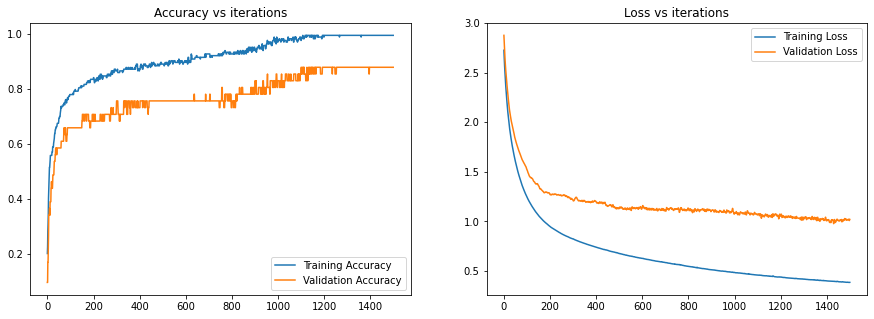

In [47]:
#Get accuracy from the model
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

#Get losses from the model
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(1500)

#Plot training and validation losses and accuracy
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend()
plt.title("Accuracy vs iterations")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend()
plt.title("Loss vs iterations")
plt.show()

In [52]:
test_data_pt = pd.read_csv(path+"data_point.txt",header=None)
test_data_pt.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176


In [53]:
test_data_pt[1] = le1.transform(test_data_pt[1])
test_data_pt[2] = le2.transform(test_data_pt[2])
test_data_pt[3] = le3.transform(test_data_pt[3])
test_data_pt[4] = le4.transform(test_data_pt[4])
test_data_pt[5] = le5.transform(test_data_pt[5])
test_data_pt[6] = le6.transform(test_data_pt[6])
test_data_pt[7] = le7.transform(test_data_pt[7])
test_data_pt[16] = le8.transform(test_data_pt[16])
test_data_pt[13] = le9.transform(test_data_pt[13])
test_data_pt[14] = le10.transform(test_data_pt[14])

test_data_pt = scaler.transform(test_data_pt)

In [57]:
pred = model.predict(test_data_pt)
print("Insurance risk score (Symboling):",np.argmax(pred[0][:])-2)

Insurance risk score (Symboling): 0
